In [1]:
import matplotlib.pyplot as plt
from _code.markov_chain import MarkovChain
from _code.markov_dict import MarkovDict
from _code.syntax_chain import SyntaxChain
import cPickle as pickle
%matplotlib inline
import pandas as pd
import numpy as np

### Open up Neighbors File
Neighbors finds words from the seed that are in the corpus when the seed is not

In [2]:
with open('data/neighbours.pkl') as f:
    neighbor_dict = pickle.load(f)

### Fit Dictionary
This has parameters:
* fname is the path to a text file of the corpus  
* gram_size is the n_gram size for the MarkovDict
* gtype in [naive, pos, syntax, syntax_pos], naive is chains with just words from the corpus, pos if Part of Speech tags added as criteria, syntax has syntax tags and syntax_pos has both.

In [3]:
print 'Fitting Dictionary'
fname = 'data/obama_corpus.txt'
gram_size = 3
md = MarkovDict(fname, gram_size, gtype='syntax_pos')

Fitting Dictionary
Fitting Syntax Model
Loading from file
Syntax Model Complete


### Fit Markov Chain
MarkovChain requires an MarkovDict to run; it takes these parameters:
* MarkovDict.api, a dictionary allowing MarkovChain to access relevant details about the MarkovDict
* priority_list (kwarg): a list of words to use as the seed from the input phrase.  Words on this list need to appear in the corpus.
* not_found_list (kwarg): a list of phrases to return if the MarkovChain cannot find the input phrase or a neighbor in the corpus.
* MarkovChain self generates priority and not_found_list if omitted, or they can be passed in
* neighbor_dict is a dictionary of words with keys being lists of neighbors. If omitted, neighbor functionality is disabled


In [4]:
priority_list = ['america', 'iran', 'iraq', 'health', 'terrorism']
not_found_list = [
    'Change will not come if we wait for some other person or some other time. We are the ones we\'ve been waiting for. We are the change that we seek.',
    'If you\'re walking down the right path and you\'re willing to keep walking, eventually you\'ll make progress.',
    'The future rewards those who press on. I don\'t have time to feel sorry for myself. I don\'t have time to complain. I\'m going to press on.',
    'I don\'t oppose all wars. What I am opposed to is a dumb war. What I am opposed to is a rash war.',
    'There\'s not a liberal America and a conservative America - there\'s the United States of America.']

mc = MarkovChain(md.api, neighbor_dict=neighbor_dict)
mc.priority_list


[u'new',
 u'american',
 u"that's",
 u'us',
 u'people',
 u'make',
 u'every',
 u'one',
 u"it's",
 u'work']

### Run the Chain!
Run with whatever seed you want!
MarkovChain has two tuning parameters that are put into the run method. Key Gram Size determines how much of the contextual phrase to pull from.  This is a bit complex.  If you set MarkovDict.gram_size to a small number, then context will be small and many possible values will follow each key.  Key Gram Size determines how much of the context being searched for to put in the return text.  Value Gram Size looks at the dictionary for that context and pulls a list of possible following phrases.  It chooses one of those phrases and takes Value Gram Size words from it.  The new key is now the Chain Length final words of the return text.

In [5]:
mc.run('congress', key_gram_size=2, value_gram_size=2)

'In 2 weeks, I will be sending a budget to Congress information about the State of our union.'

### Syntax Only Sentence Generation
We can also generate sentences using only syntax, part of speech, or both.  This only takes a filename and a gtype of ['syntax', 'pos', 'syntax_pos'] with similar definitions to above. SyntaxChain selects from real grammar from a complete sentence in the corpus, min_appearnces is the minimum times a structure needs to appear in the corpus to be selected.  This produces odd results.

In [6]:
sc = SyntaxChain(fname, gtype='syntax')

Loading from file


In [7]:
sc.run(min_appearances=1)

'Spending But our recovery funds rewards for of decades,'

### Generate Wordcloud

/Users/joelshuman/anaconda/lib/python2.7/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


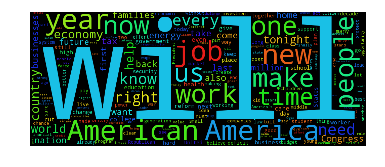

In [8]:
args = dict(max_words=200,
           background_color='black',
           height=400,
           width=1000)
md.wordcloud(**args)

### Generate Histogram of Markov Chain uniqueness
Change MarkovDict gram_size to see this change.  The log argument takes the log of the x-axis.

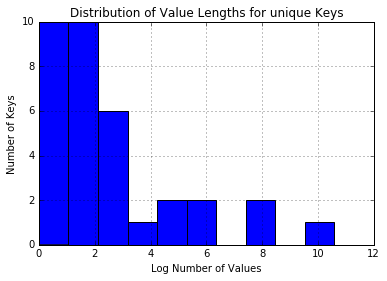

In [12]:
md.plot_dist(log=True)